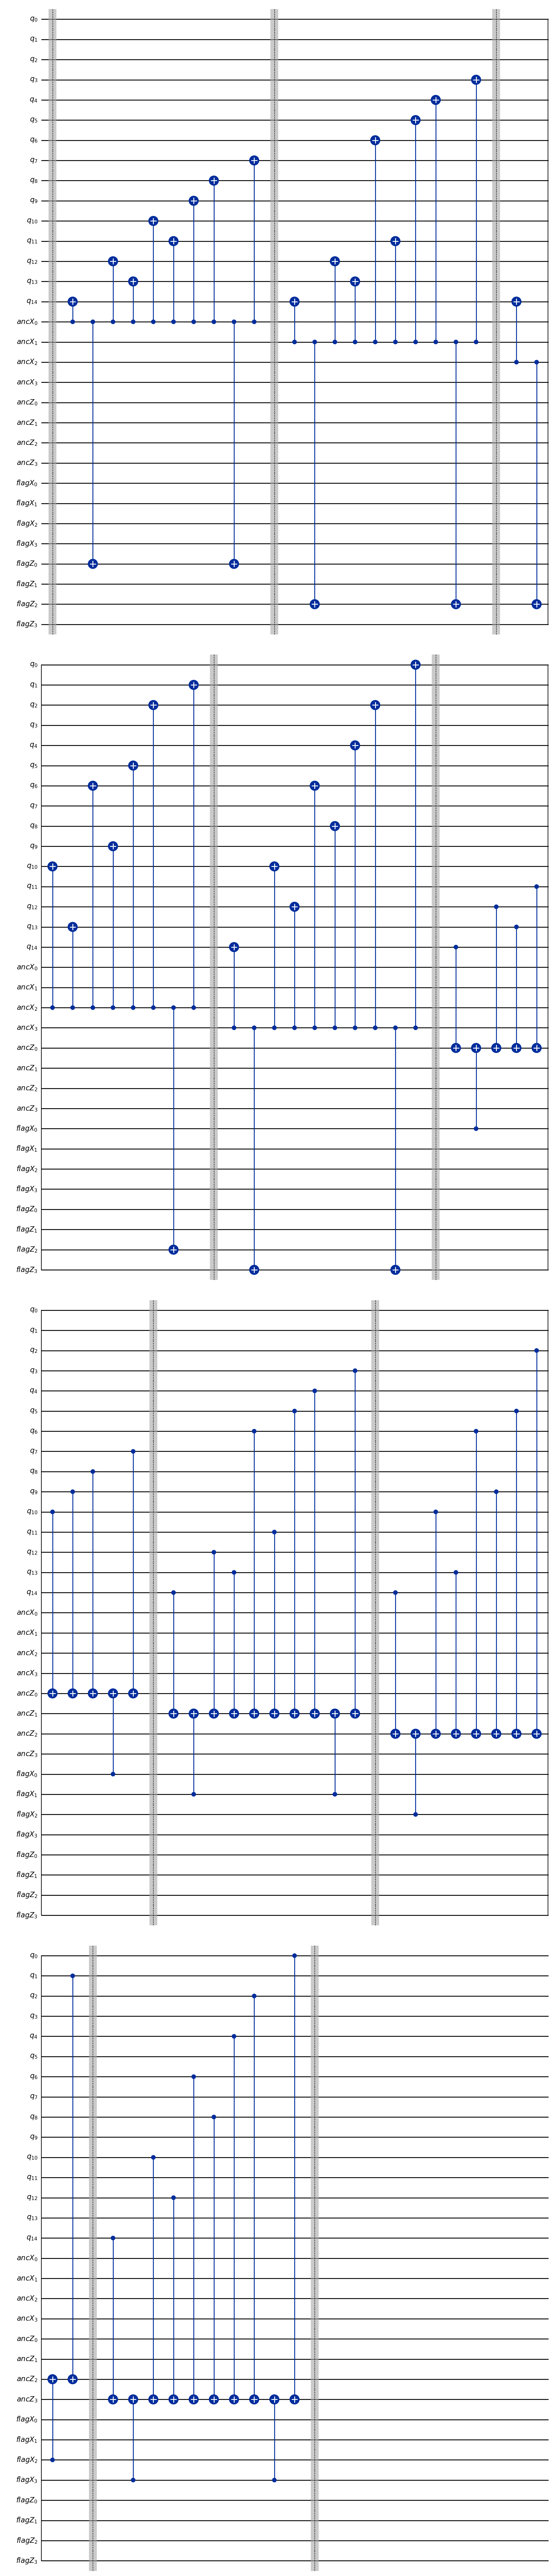

In [11]:
from qiskit import QuantumCircuit
from flag_analysis import *

# Load circuit from QASM file
qc = QuantumCircuit.from_qasm_file("[[15,7,3]]_flag.qasm")

# Draw the circuit (matplotlib drawer)
qc.draw("mpl", filename="[[15,7,3]]_flag.png")

In [12]:
from qiskit import QuantumCircuit

qc = QuantumCircuit.from_qasm_file("/Users/wuboris/Desktop/flag verification/[[15,7,3]]_flag.qasm")
subs =split_circuit_full_q_compact_flags(qc)

# show summary
print(f"Total stabilizers found: {len(subs)}")
for i, sub in enumerate(subs):
    print(f"Subcircuit {i} has {len(sub.data)} gates")

# optionally save them
save_qasm_full_slices(qc, prefix="[[15,7,3]]]_flag_stab")

Total stabilizers found: 8
Subcircuit 0 has 11 gates
Subcircuit 1 has 11 gates
Subcircuit 2 has 11 gates
Subcircuit 3 has 11 gates
Subcircuit 4 has 11 gates
Subcircuit 5 has 11 gates
Subcircuit 6 has 11 gates
Subcircuit 7 has 11 gates
Saved: [[15,7,3]]]_flag_stab_0.qasm
Saved: [[15,7,3]]]_flag_stab_1.qasm
Saved: [[15,7,3]]]_flag_stab_2.qasm
Saved: [[15,7,3]]]_flag_stab_3.qasm
Saved: [[15,7,3]]]_flag_stab_4.qasm
Saved: [[15,7,3]]]_flag_stab_5.qasm
Saved: [[15,7,3]]]_flag_stab_6.qasm
Saved: [[15,7,3]]]_flag_stab_7.qasm


In [13]:
from flag_analysis import *
# Build
state, qc, varenv = build_variable_state_from_qasm("[[15,7,3]]_flag.qasm")
groups = detect_qubit_groups(qc)

# Flip predicates (basis-aware)
synX_exprs = ancillas_X(state, groups["ancX"])   # X-type syndromes (check .z)
synZ_exprs = ancillas_Z(state, groups["ancZ"])   # Z-type syndromes (check .x)
flgX_exprs = flags_X(state, groups["flagX"])     # flags measured in X (check .z)
flgZ_exprs = flags_Z(state, groups["flagZ"])     # flags measured in Z (check .x)

# Build an assignment:
# - allow arbitrary data errors via named vars (you can set a subset True)
# - force all anc/flag variables to False to model "no circuit faults"
asgmt = {}

# Force all anc/flag vars False:
for name in varenv:
    if name.startswith("ancX") or name.startswith("ancZ") or name.startswith("flagX") or name.startswith("flagZ"):
        asgmt[name] = False

# Example 1: single X error on q[3]  (Steane’s first X-stabilizer should click)

# (all other q*_x/z default to False)

# Evaluate syndromes/flags
synX_vals = [eval_under(e, asgmt, varenv) for e in synX_exprs]
synZ_vals = [eval_under(e, asgmt, varenv) for e in synZ_exprs]
flgX_vals = [eval_under(e, asgmt, varenv) for e in flgX_exprs]
flgZ_vals = [eval_under(e, asgmt, varenv) for e in flgZ_exprs]

print("AncX (X-type) syndromes:", synX_vals)
print("AncZ (Z-type) syndromes:", synZ_vals)
print("Flags X-basis:", flgX_vals)
print("Flags Z-basis:", flgZ_vals)

AncX (X-type) syndromes: [Not(((((((q14_z == q12_z) == q13_z) == q10_z) == q11_z) ==
      q9_z) ==
     q8_z) ==
    q7_z), Not(((((((q14_z == q12_z) == q13_z) == q6_z) == q11_z) ==
      q5_z) ==
     q4_z) ==
    q3_z), Not(((((((q14_z == q10_z) == q13_z) == q6_z) == q9_z) ==
      q5_z) ==
     q2_z) ==
    q1_z), Not(((((((q14_z == q10_z) == q12_z) == q6_z) == q8_z) ==
      q4_z) ==
     q2_z) ==
    q0_z)]
AncZ (Z-type) syndromes: [Not(((((((q14_x == q12_x) == q13_x) == q11_x) == q10_x) ==
      q9_x) ==
     q8_x) ==
    q7_x), Not(((((((q14_x == q12_x) == q13_x) == q6_x) == q11_x) ==
      q5_x) ==
     q4_x) ==
    q3_x), Not(((((((q14_x == q10_x) == q13_x) == q6_x) == q9_x) ==
      q5_x) ==
     q2_x) ==
    q1_x), Not(((((((q14_x == q10_x) == q12_x) == q6_x) == q8_x) ==
      q4_x) ==
     q2_x) ==
    q0_x)]
Flags X-basis: [False, False, False, False]
Flags Z-basis: [False, False, False, False]


In [14]:
# Build circuit state first, to get varenv with q{i}_x/z
state, qc, varenv = build_variable_state_from_qasm("/Users/wuboris/Desktop/flag verification/[[15,7,3]]_flag.qasm")

#print("varenv:", varenv)
# Load stabilizers
stabs = load_symplectic_txt("[[15,7,3]].txt ")
#print("Stabilizers:", stabs)
# Get Boolean formulas
stab_exprs = [anticomm_formula(Sx, Sz, varenv) for Sx,Sz in stabs]

for i, e in enumerate(stab_exprs):
    print(f"Stabilizer {i} formula:", e)



Stabilizer 0 formula: Xor(Xor(Xor(Xor(Xor(Xor(Xor(Xor(False, q7_z), q8_z), q9_z),
                    q10_z),
                q11_z),
            q12_z),
        q13_z),
    q14_z)
Stabilizer 1 formula: Xor(Xor(Xor(Xor(Xor(Xor(Xor(Xor(False, q3_z), q4_z), q5_z),
                    q6_z),
                q11_z),
            q12_z),
        q13_z),
    q14_z)
Stabilizer 2 formula: Xor(Xor(Xor(Xor(Xor(Xor(Xor(Xor(False, q1_z), q2_z), q5_z),
                    q6_z),
                q9_z),
            q10_z),
        q13_z),
    q14_z)
Stabilizer 3 formula: Xor(Xor(Xor(Xor(Xor(Xor(Xor(Xor(False, q0_z), q2_z), q4_z),
                    q6_z),
                q8_z),
            q10_z),
        q12_z),
    q14_z)
Stabilizer 4 formula: Xor(Xor(Xor(Xor(Xor(Xor(Xor(Xor(False, q7_x), q8_x), q9_x),
                    q10_x),
                q11_x),
            q12_x),
        q13_x),
    q14_x)
Stabilizer 5 formula: Xor(Xor(Xor(Xor(Xor(Xor(Xor(Xor(False, q3_x), q4_x), q5_x),
                  

In [15]:
from flag_analysis import check_ancillas_match_symplectic_ordered

report = check_ancillas_match_symplectic_ordered(
    "/Users/wuboris/Desktop/flag verification/[[15,7,3]]_flag.qasm",
    "/Users/wuboris/Desktop/flag verification/[[15,7,3]].txt ",
    order="X-then-Z"   # change to "Z-then-X" if your .txt lists Z-first
)

print("OK?", report["ok"])

print("Mismatches:", report["mismatches"])

Overall ordered match: True
OK? True
Mismatches: []


In [16]:
from flag_analysis import *

bad_locations_dict = {}  # Dictionary to store bad locations and gate numbers for each subcircuit
gate_count = 0

for j in range(8):  # Iterate over stabilizers (subcircuits)
    bad_location_in_sub = []
    gate_numbers_in_sub = []  # Store gate numbers for the current subcircuit

    print(f"--- Stabilizer {j} ---")
    for i in range(6):  # Iterate over gates in the subcircuit
        state, qc, site_info, groups = build_state_with_fault_after_gate(
            f"[[15,7,3]]]_flag_stab_{j}.qasm",
            gate_index=i,
            fault_mode="2q"
        )
        # Count the number of gates in the subcircuit
        #num_gates = sum(1 for inst in qc.data if inst.operation.name not in ["barrier", "measure"])
        num_gates = sum(1 for inst in qc.data )
        print("Number of gates in this subcircuit:", num_gates)

        # Extract fault variables
        fault_var = [v for k, v in site_info["vars"].items() if k.startswith("f")]

        # Extract qubit groups
        data_idxs = groups["data"]
        ancz_idxs = groups["ancZ"]
        flagx_idxs = groups["flagX"]
        ancx_idxs = groups["ancX"]
        flagz_idxs = groups["flagZ"]

        # Extract error components
        E_x = [state.qubits[i].x for i in data_idxs]
        E_z = [state.qubits[i].z for i in data_idxs]

        # Inject flag errors
        if flagx_idxs:
            flag_var = inject_flag_symbolic_one_axis(state, flagx_idxs[0], axis="z", prefix="flagErr")
        elif flagz_idxs:
            flag_var = inject_flag_symbolic_one_axis(state, flagz_idxs[0], axis="x", prefix="flagErr")

        # Build stabilizer-equivalent errors
        Epx, Epz, gsel = build_stab_equiv_errors(E_x, E_z, "[[15,7,3]].txt ")

        # Build per-qubit error indicators
        b = [Or(xi, zi) for xi, zi in zip(Epx, Epz)]

        # Create a Z3 solver
        from z3 import Solver, Or, PbLe, ForAll, Xor, Implies, Exists
        s = Solver()
        s.add(ForAll(fault_var, Implies(Or(fault_var), Exists(gsel, PbLe([(bi, 1) for bi in b], 1)))))
        s.add(Xor(site_info["act"], flag_var))

        # Check satisfiability
        print("i ", i, s.check())
        if s.check() == unsat:
            print("Bad location found at gate index:", i)
            bad_location_in_sub.append(i + gate_count)  # Store global gate index
            gate_numbers_in_sub.append(i)  # Store local gate index in the subcircuit

    # Update the gate count for the next subcircuit
    gate_count += num_gates

    # Store bad locations and gate numbers for the current subcircuit
    bad_locations_dict[j] = {
        "bad_locations": bad_location_in_sub,
        "gate_numbers": gate_numbers_in_sub
    }

# Print the results
print("Bad locations dictionary:")
for subcircuit, info in bad_locations_dict.items():
    print(f"Subcircuit {subcircuit}:")
    print(f"  Bad locations (global indices): {info['bad_locations']}")
    print(f"  Gate numbers (local indices): {info['gate_numbers']}")

print(len(bad_locations_dict))

    

--- Stabilizer 0 ---
Number of gates in this subcircuit: 11
i  0 sat
Number of gates in this subcircuit: 11
i  1 sat
Number of gates in this subcircuit: 11
i  2 unsat
Bad location found at gate index: 2
Number of gates in this subcircuit: 11
i  3 unsat
Bad location found at gate index: 3
Number of gates in this subcircuit: 11
i  4 unsat
Bad location found at gate index: 4
Number of gates in this subcircuit: 11
i  5 unsat
Bad location found at gate index: 5
--- Stabilizer 1 ---
Number of gates in this subcircuit: 11
i  0 sat
Number of gates in this subcircuit: 11
i  1 sat
Number of gates in this subcircuit: 11
i  2 unsat
Bad location found at gate index: 2
Number of gates in this subcircuit: 11
i  3 unsat
Bad location found at gate index: 3
Number of gates in this subcircuit: 11
i  4 unsat
Bad location found at gate index: 4
Number of gates in this subcircuit: 11
i  5 unsat
Bad location found at gate index: 5
--- Stabilizer 2 ---
Number of gates in this subcircuit: 11
i  0 sat
Number of

In [17]:
###################################
#####check if the flag raised######
###################################
for i in range(len(bad_locations_dict)):  # Iterate over stabilizers (subcircuits)
    
    state, qc, sites_info, groups = build_state_with_faults_after_gates(f"/Users/wuboris/Desktop/flag verification/[[15,7,3]]]_flag_stab_{i}.qasm",bad_locations_dict[i]['gate_numbers'], fault_mode="2q")    
    #print(sites_info)

    data_idxs = groups["data"]
    ancz_idxs = groups["ancZ"]
    flagx_idxs = groups["flagX"]
    ancx_idxs = groups["ancX"]
    flagz_idxs = groups["flagZ"]


    fault_var = [[v for k,v in s["vars"].items() if k.startswith("f")] for s in sites_info]
    #print("Injected fault variables:", fault_var)


    all_fault_vars = fault_var[0] + fault_var[1]
    acts = [s["act"] for s in sites_info]
    #print("Active fault sites:", acts)
    #print("Data qubits:", data_idxs)
    #print("Ancilla qubits (Z-basis):", anc_idxs)
    #print("Flag qubits (X-basis):", flag_idxs)

    E_x = [state.qubits[i].x for i in data_idxs]
    E_z = [state.qubits[i].z for i in data_idxs]

    if groups["flagX"] != []: F = [state.qubits[i].z for i in groups["flagX"]]
    elif groups["flagZ"] != []: F = [state.qubits[i].x for i in groups["flagZ"]]
    else: print("No flag qubits found.")


    #print("flag :", F)

    Epx, Epz, gsel = build_stab_equiv_errors(E_x, E_z, "[[15,7,3]].txt ")
    b= [Or(xi, zi) for xi, zi in zip(Epx, Epz)]

    s = Solver()
    # Add the constraint to the solver
    s.add(ForAll(all_fault_vars, Implies(
        And(
            Not(Exists(gsel, PbLe([(bi, 1) for bi in b], 1))),
            Xor(acts[0], acts[1])
        ),
        F[0]  # Combine F_z into a single condition if it's a list
    )))

    print(s.check())


Processing gate 0: cx on qubits [15, 14]
Processing gate 1: cx on qubits [15, 16]
Processing gate 2: cx on qubits [15, 12]
Processing gate 3: cx on qubits [15, 13]
Processing gate 4: cx on qubits [15, 10]
Processing gate 5: cx on qubits [15, 11]
Processing gate 6: cx on qubits [15, 9]
Processing gate 7: cx on qubits [15, 8]
Processing gate 8: cx on qubits [15, 16]
Processing gate 9: cx on qubits [15, 7]
Processing gate 10: barrier on qubits [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
sat
Processing gate 0: cx on qubits [15, 14]
Processing gate 1: cx on qubits [15, 16]
Processing gate 2: cx on qubits [15, 12]
Processing gate 3: cx on qubits [15, 13]
Processing gate 4: cx on qubits [15, 6]
Processing gate 5: cx on qubits [15, 11]
Processing gate 6: cx on qubits [15, 5]
Processing gate 7: cx on qubits [15, 4]
Processing gate 8: cx on qubits [15, 16]
Processing gate 9: cx on qubits [15, 3]
Processing gate 10: barrier on qubits [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1

In [8]:
all_bad_locations = []
for info in bad_locations_dict.values():
    all_bad_locations.extend(info['bad_locations'])

print("All bad locations (global indices):", all_bad_locations)


All bad locations (global indices): [2, 3, 4, 5, 13, 14, 15, 16, 24, 25, 26, 27, 35, 36, 37, 38, 46, 47, 48, 49, 57, 58, 59, 60, 68, 69, 70, 71, 79, 80, 81, 82]


In [9]:
clean_qc = remove_flag_gates("[[15,7,3]]_flag.qasm", save_path="[[15,7,3]]_no_flag.qasm")
print("Original gates:", len(clean_qc.data))


Original gates: 73


In [10]:
from z3 import PbGe
state, qc, sites_info, groups = build_state_with_faults_after_gates( "/Users/wuboris/Desktop/flag verification/[[15,7,3]]_flag.qasm",bad_locations_dict, fault_mode="2q")   
#print(sites_info)
data_idxs = groups["data"]
ancz_idxs = groups["ancZ"]
flagx_idxs = groups["flagX"]
ancx_idxs = groups["ancX"]
flagz_idxs = groups["flagZ"]

print("Data qubits:", data_idxs)
print("Ancilla qubits (Z-basis):", ancz_idxs)
print("Ancilla qubits (X-basis):", ancx_idxs)
print("Flag qubits (X-basis):", flagx_idxs)
print("Flag qubits (Z-basis):", flagz_idxs)

after_flag_state_X = [state.qubits[i].x for i in data_idxs]
after_flag_state_Z = [state.qubits[i].z for i in data_idxs]

fault_var = [[v for k,v in s["vars"].items() if k.startswith("f")] for s in sites_info]
gate_fault_constr = [Or(f) for f in fault_var if f != []]



flag_err_var =  []

flag_err_var.extend(inject_on_flags(state, flagx_idxs, axis="z", prefix="flagErr"))


flag_err_var.extend(inject_on_flags(state, flagz_idxs, axis="x", prefix="flagErr"))
print("flagz_idxs", flagz_idxs)
print("flag_err_var", flag_err_var)
anc_err_var = [] 

anc_err_var.extend(inject_on_flags(state, ancx_idxs, axis="z", prefix="ancErr"))
anc_err_var.extend(inject_on_flags(state, ancz_idxs, axis="x", prefix="ancErr"))

all_fault = gate_fault_constr+ flag_err_var + anc_err_var

one_fault_constr = [ And (PbGe( [(f,1) for f in all_fault], 1), PbLe( [(f,1) for f in all_fault], 1))]



var = [sub for sub in fault_var for sub in sub] + flag_err_var + anc_err_var

ren_1 = make_renamer_from_symbols(var, "_p1")
ren_2 = make_renamer_from_symbols(var, "_p2")

one_fault_constr_p1 = primed_copy(one_fault_constr, ren_1)
one_fault_constr_p2 = primed_copy(one_fault_constr, ren_2)

print("one_fault_constr_p1", one_fault_constr_p1)
print("one_fault_constr_p2", one_fault_constr_p2)


A = [state.qubits[i].z for i in ancx_idxs] + [state.qubits[i].x for i in ancz_idxs]
F = [state.qubits[i].z for i in flagx_idxs] + [state.qubits[i].x for i in flagz_idxs]

print("Flag expr")


A_1 = primed_copy(A, ren_1)
A_2 = primed_copy(A, ren_2)
F_1 = primed_copy(F, ren_1)
F_2 = primed_copy(F, ren_2)

after_raw_state, snap = symbolic_propagate_with_resets("/Users/wuboris/Desktop/flag verification/[[15,7,3]]_no_flag.qasm" ,state, track_steps= True)

E_x = [after_raw_state.qubits[i].x for i in data_idxs]
E_z = [after_raw_state.qubits[i].z for i in data_idxs]

raw_A = [after_raw_state.qubits[i].z for i in ancx_idxs] + [after_raw_state.qubits[i].x for i in ancz_idxs]

E_x_1 = primed_copy(E_x, ren_1)
E_z_1 = primed_copy(E_z, ren_1)
E_x_2 = primed_copy(E_x, ren_2)
E_z_2 = primed_copy(E_z, ren_2)

raw_A_1 = primed_copy(raw_A, ren_1)
raw_A_2 = primed_copy(raw_A, ren_2)

gen_syn_1 = A_1 + F_1 + raw_A_1
gen_syn_2 = A_2 + F_2 + raw_A_2

stab_eq , gsel = exists_stab_equiv(E_x_1, E_z_1, E_x_2, E_z_2, "/Users/wuboris/Desktop/flag verification/[[15,7,3]].txt ")




same_syn =  And( *[x == y for x, y in zip(gen_syn_1, gen_syn_2)] )

s.add(same_syn, Not(Exists(gsel, stab_eq)))
s.add(one_fault_constr_p1)
s.add(one_fault_constr_p2)


print(s.check()) 


Processing gate 0: barrier on qubits [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Processing gate 1: cx on qubits [15, 14]
Processing gate 2: cx on qubits [15, 27]
Processing gate 3: cx on qubits [15, 12]
Processing gate 4: cx on qubits [15, 13]
Processing gate 5: cx on qubits [15, 10]
Processing gate 6: cx on qubits [15, 11]
Processing gate 7: cx on qubits [15, 9]
Processing gate 8: cx on qubits [15, 8]
Processing gate 9: cx on qubits [15, 27]
Processing gate 10: cx on qubits [15, 7]
Processing gate 11: barrier on qubits [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Processing gate 12: cx on qubits [16, 14]
Processing gate 13: cx on qubits [16, 29]
Processing gate 14: cx on qubits [16, 12]
Processing gate 15: cx on qubits [16, 13]
Processing gate 16: cx on qubits [16, 6]
Processing gate 17: cx on qubits [16, 11]
Processing gate 18: cx on qubits [16

In [64]:
for d in s.model().decls(): 
    
    val = s.model()[d]
    if str(val)  == "True": 
        print(f"{d.name()} = {val}")


flagErr24_z_p2 = True
faulty_gate60_z1_p1 = True


In [75]:
print("Ancilla measurements (should be all 0):", simplify(A[6]))

print("Flag measurements (should be all 0):", simplify(F[6]))


val_1 =  {"faulty_gate35_x0" : True, "faulty_gate35_x1" : True}
val_2 =  { "faulty_gate16_x0" : True }
for i in range(len(A)): 
    print(f"A_{i}", eval_with_values(A[i], val_1),  eval_with_values(A[i], val_2))
for i in range(len(F)): 
    print(f"F_{i}", eval_with_values(F[i], val_1), eval_with_values(F[i], val_2))

for i in range(len(raw_A)): 
    print(f"raw_A_{i}", eval_with_values(raw_A[i], val_1) , eval_with_values(raw_A[i], val_2))

Ancilla measurements (should be all 0): ((((faulty_gate24_x0 == faulty_gate25_x0) ==
   faulty_gate26_x0) ==
  faulty_gate27_x0) ==
 ((((((((((faulty_gate68_x1 ==
           ((((((((faulty_gate2_x0 == faulty_gate3_x0) ==
                  faulty_gate4_x0) ==
                 faulty_gate5_x1) ==
                faulty_gate24_x0) ==
               faulty_gate25_x1) ==
              faulty_gate35_x0) ==
             faulty_gate36_x1) ==
            faulty_gate49_x0)) ==
          faulty_gate69_x1) ==
         (((((faulty_gate24_x0 == faulty_gate25_x0) ==
             ((((faulty_gate2_x0 == faulty_gate3_x0) ==
                faulty_gate4_x1) ==
               (faulty_gate13_x0 == faulty_gate14_x0)) ==
              faulty_gate15_x1)) ==
            faulty_gate26_x1) ==
           faulty_gate48_x0) ==
          faulty_gate59_x0)) ==
        faulty_gate70_x1) ==
       ((((((((faulty_gate13_x0 == faulty_gate14_x0) ==
              faulty_gate15_x0) ==
             faulty_gate16_x1) ==
     

In [13]:
s2 = Solver()
s2.add(F[0] == True)
s2.add(one_fault_constr)
print(s2.check())
print(s2.model())


for i in range(len(A)): 
    print(f"A_{i}", eval_with_values(A[i], { 'faulty_gate54_z0':True}))

for i in range(len(F)): 
    print(f"F_{i}", eval_with_values(F[i], { 'faulty_gate54_z0':True}))

sat
[faulty_gate60_x1 = False,
 ancErr15_z = False,
 faulty_gate48_z0 = False,
 faulty_gate71_z0 = False,
 faulty_gate57_x1 = False,
 ancErr21_x = False,
 faulty_gate79_z0 = False,
 faulty_gate59_x1 = False,
 faulty_gate82_z1 = False,
 faulty_gate60_z0 = False,
 flagErr28_x = False,
 faulty_gate57_z0 = False,
 faulty_gate59_z0 = False,
 faulty_gate57_x0 = False,
 faulty_gate68_z0 = False,
 faulty_gate5_x1 = False,
 flagErr24_z = False,
 flagErr25_z = False,
 faulty_gate35_x0 = False,
 faulty_gate4_x0 = False,
 ancErr19_x = False,
 faulty_gate70_x1 = False,
 faulty_gate58_z1 = True,
 faulty_gate80_z0 = False,
 ancErr22_x = False,
 faulty_gate15_x0 = False,
 flagErr29_x = False,
 faulty_gate3_x0 = False,
 faulty_gate59_z1 = False,
 flagErr30_x = False,
 faulty_gate36_x1 = False,
 flagErr27_x = False,
 faulty_gate16_z1 = False,
 flagErr26_z = False,
 faulty_gate69_x1 = False,
 ancErr16_z = False,
 faulty_gate49_x1 = False,
 faulty_gate60_z1 = False,
 faulty_gate57_z1 = False,
 ancErr17_z 

In [14]:
m =s.model()
for E in E_x_1:
    val  = m.eval(E,model_completion=True)
    print("E_x_1", val)

for E in E_z_1:
    val  = m.eval(E,model_completion=True)
    print("E_z_1", val)

for E in E_x_2:
    val  = m.eval(E,model_completion=True)
    print("E_x_2", val)

for E in E_z_2:
    val  = m.eval(E,model_completion=True)
    print("E_z_2", val)


for A in A_1:
    val  = m.eval(A,model_completion=True)
    print("A_1", val)
for F in F_1:
    val  = m.eval(F,model_completion=True)
    print("F_1", val)

for A in A_2:
    val  = m.eval(A,model_completion=True)
    print("A_2", val)
for F in F_2:
    val  = m.eval(F,model_completion=True)
    print("F_2", val)

for raw_A in raw_A_1:
    val  = m.eval(raw_A,model_completion=True)
    print("raw_A_1", val)

for raw_A in raw_A_2:
    val  = m.eval(raw_A,model_completion=True)
    print("raw_A_2", val)


E_x_1 False
E_x_1 False
E_x_1 False
E_x_1 False
E_x_1 False
E_x_1 False
E_x_1 False
E_x_1 False
E_x_1 False
E_x_1 False
E_x_1 False
E_x_1 False
E_x_1 True
E_x_1 False
E_x_1 True
E_z_1 False
E_z_1 False
E_z_1 False
E_z_1 False
E_z_1 False
E_z_1 False
E_z_1 False
E_z_1 False
E_z_1 False
E_z_1 False
E_z_1 False
E_z_1 False
E_z_1 False
E_z_1 False
E_z_1 False
E_x_2 False
E_x_2 False
E_x_2 True
E_x_2 False
E_x_2 False
E_x_2 True
E_x_2 True
E_x_2 False
E_x_2 False
E_x_2 True
E_x_2 True
E_x_2 False
E_x_2 False
E_x_2 True
E_x_2 True
E_z_2 False
E_z_2 False
E_z_2 False
E_z_2 False
E_z_2 False
E_z_2 False
E_z_2 False
E_z_2 False
E_z_2 False
E_z_2 False
E_z_2 False
E_z_2 False
E_z_2 False
E_z_2 False
E_z_2 False
A_1 False
A_1 False
A_1 False
A_1 False
A_1 False
A_1 False
A_1 True
A_1 False
F_1 False
F_1 False
F_1 False
F_1 False
F_1 False
F_1 False
F_1 True
F_1 False
A_2 False
A_2 False
A_2 False
A_2 False
A_2 False
A_2 False
A_2 True
A_2 False
F_2 False
F_2 False
F_2 False
F_2 False
F_2 False
F_